In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0 ,0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [12]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.3556, -0.6222]) 
label: tensor([5.6119])


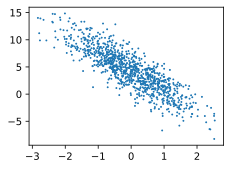

In [44]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1);

In [71]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.5338, -0.6254],
        [ 2.0713,  0.8055],
        [-1.6200,  0.3854],
        [-1.1696, -0.7755],
        [ 0.0210, -0.8145],
        [-0.2365,  0.1115],
        [ 1.9344,  1.0015],
        [-0.7934, -0.9813],
        [-0.5132,  0.2314],
        [-0.3070, -0.5927]]) 
 tensor([[ 7.3920],
        [ 5.6019],
        [-0.3362],
        [ 4.4919],
        [ 7.0005],
        [ 3.3624],
        [ 4.6682],
        [ 5.9383],
        [ 2.3814],
        [ 5.5929]])


In [72]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [70]:
def linreg(X, w, b):  
    """线性回归模型。"""
    return torch.matmul(X, w) + b

In [69]:
def squared_loss(y_hat, y):  
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [67]:
def sgd(params, lr, batch_size):  
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [73]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.034460
epoch 2, loss 0.000122
epoch 3, loss 0.000049


In [74]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0002, -0.0004], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0007], grad_fn=<RsubBackward1>)
